# Employee Attrition Prediction

This project predicts whether an employee is likely to leave the company (attrition) using Machine Learning.  
We will use the **IBM HR Analytics Attrition Dataset** from Kaggle.

# Project Workflow
1. Import Libraries & Load Dataset
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Train-Test Split
5. Model Training
6. Model Evaluation
7. Feature Importance
8. Conclusion


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# First look
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Inference:
- Dataset successfully loaded into a DataFrame.  
- Each row corresponds to an employee.  
- Key attributes include:  
  - **Personal info:** Age, Gender, MaritalStatus, Education, EducationField  
  - **Job info:** BusinessTravel, Department, JobRole, JobLevel, OverTime, JobSatisfaction  
  - **Compensation:** DailyRate, MonthlyIncome, StockOptionLevel  
  - **Work-related factors:** DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager  
  - **Performance/engagement:** TrainingTimesLastYear, WorkLifeBalance, RelationshipSatisfaction  
  - **Target variable:** **Attrition (Yes/No)** – whether an employee left the company  



# Dataset Overview
Let's explore the dataset shape, column info, and check for missing values.


In [14]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nAttrition Value Counts:")
print(df['Attrition'].value_counts())


Shape: (1470, 35)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

#Inference: Dataset Overview
- The dataset contains **1470 employees** with **35 features** (columns).  
- No missing values are present – the dataset is clean.  
- Out of 35 columns:
  - **26 are numerical** (e.g., Age, MonthlyIncome, YearsAtCompany).  
  - **9 are categorical** (e.g., Gender, JobRole, Department, OverTime).  
- The target variable **Attrition** is imbalanced:  
  - **1233 employees (84%) stayed**  
  - **237 employees (16%) left**  
- This imbalance means that model evaluation should focus on metrics like **Recall, Precision, and F1-score**, not just Accuracy.  


# Step 3: Exploratory Data Analysis (EDA)

We will explore the dataset to understand employee patterns and their relation to attrition.


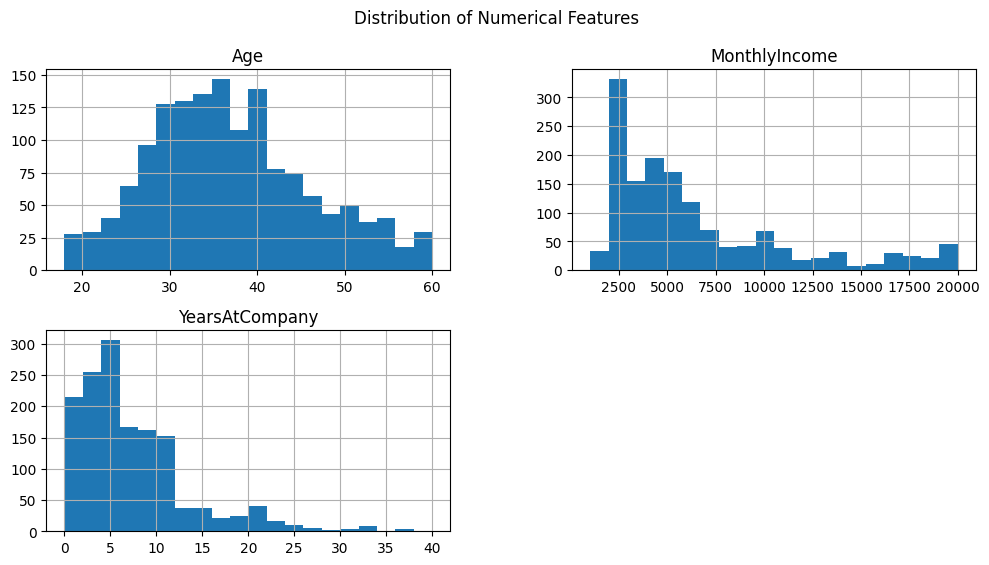

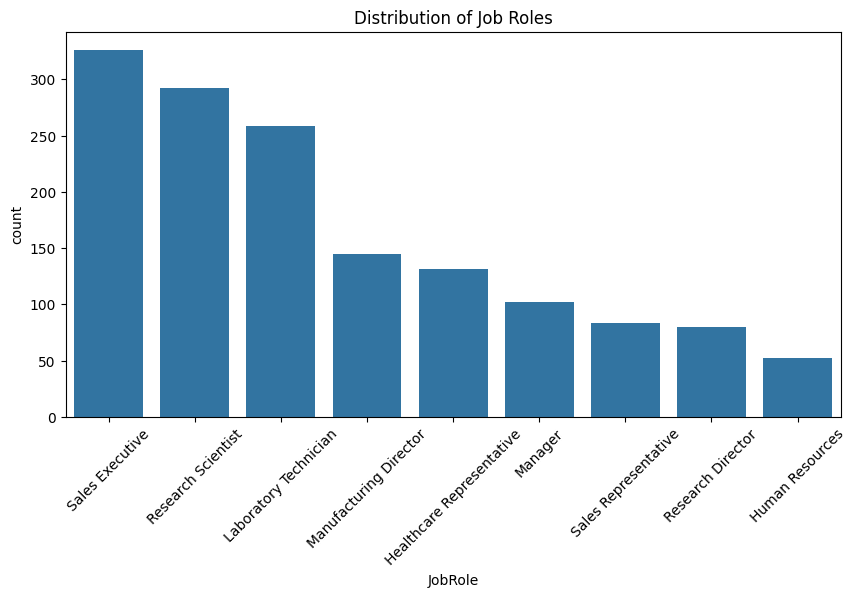

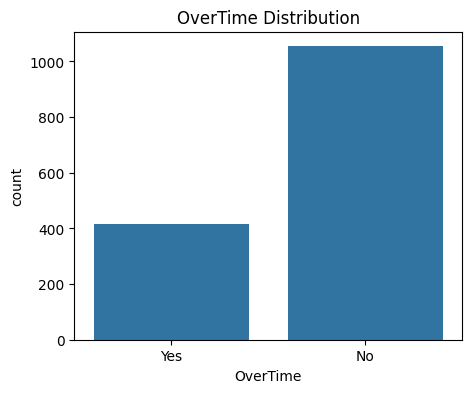

In [17]:
#-------------------------UNIVARIATE ANALYSIS-------------
# Distribution of numerical columns
df[['Age', 'MonthlyIncome', 'YearsAtCompany']].hist(bins=20, figsize=(12,6))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Countplot for categorical variables
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Job Roles")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='OverTime', data=df)
plt.title("OverTime Distribution")
plt.show()


Inference: Distribution of Numerical Features

Age: Most employees are in the 30–40 age group, meaning the workforce is relatively young to mid-career.
Monthly Income: Highly right-skewed. Majority of employees earn between 2,000–5,000, with a few high-income earners pulling the tail.
Years at Company: Most employees have spent 0–10 years in the company, with fewer long-tenure employees.
    
#Distribution of Job Roles

The largest groups are Sales Executives (~330 employees), Research Scientists (~290), and Laboratory Technicians (~260).
Smaller roles include Human Resources (~50) and Research Director (~80).
The dataset is imbalanced across job roles, which may affect attrition patterns differently.

#OverTime Distribution

Around 1,050 employees do not work overtime, while about 420 employees work overtime.
The dataset shows that most employees don’t do overtime, but a significant portion (~28%) do.
Since overtime often relates to work stress and job satisfaction, it could be an important factor influencing attrition.

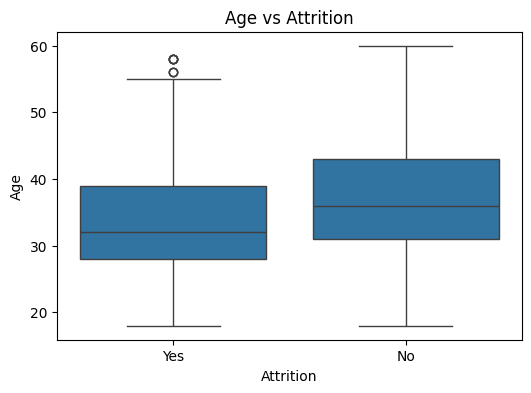

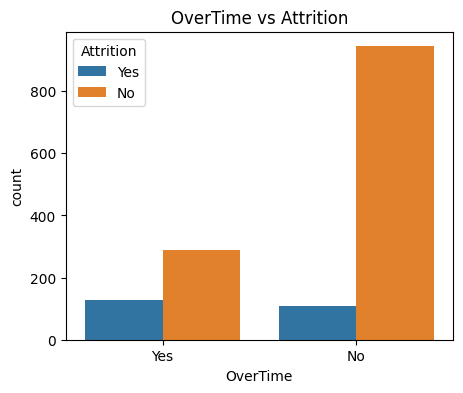

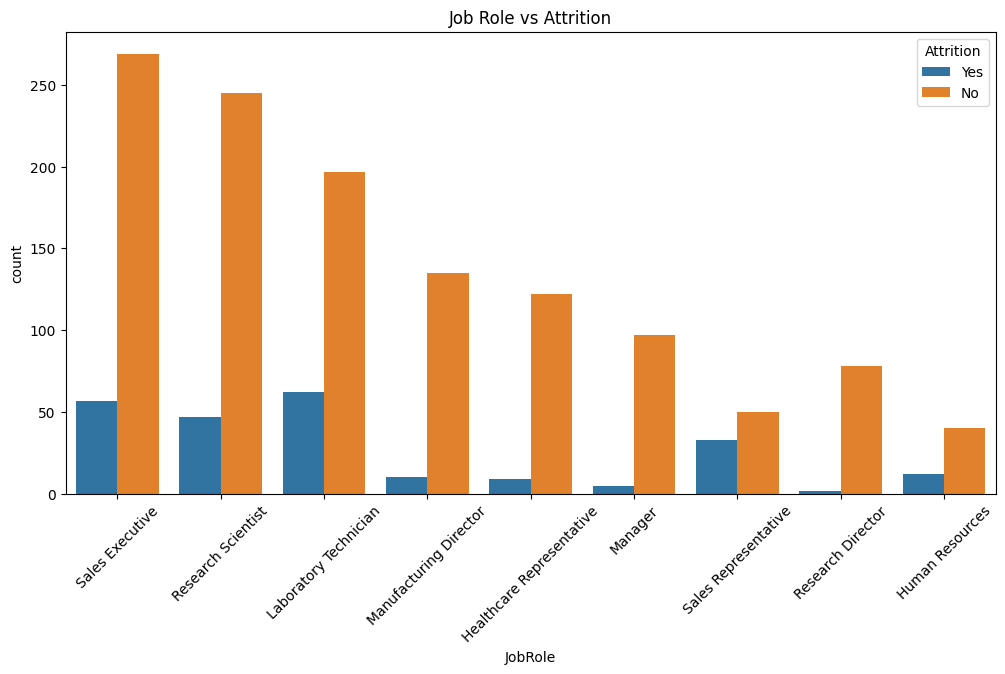

In [18]:
#----------------------------BIVARIATE ANALYSIS-------------
# Age vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()

# OverTime vs Attrition
plt.figure(figsize=(5,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()

# JobRole vs Attrition
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Job Role vs Attrition")
plt.show()


### Inference: Age vs Attrition
- Employees who left (`Attrition = Yes`) are generally **younger** than those who stayed.
- Median age of employees with attrition is around early 30s, while retained employees are slightly older.
- This suggests that **younger employees are more likely to leave the company**, possibly due to exploring better opportunities.
### Inference: OverTime vs Attrition
- A higher proportion of employees who worked **overtime** experienced attrition.
- Employees with **no overtime work** mostly stayed in the company.
- This indicates that **work-life imbalance due to overtime is a major driver of attrition**.
### Inference: Job Role vs Attrition
- **Sales Executives and Laboratory Technicians** show the highest attrition rates.
- **Research Scientists** also show moderate attrition.
- Roles like **Manager, Manufacturing Director, and Research Director** have the lowest attrition.
- This shows that **junior and mid-level employees face more attrition**, while leadership and specialized positions are more stable.


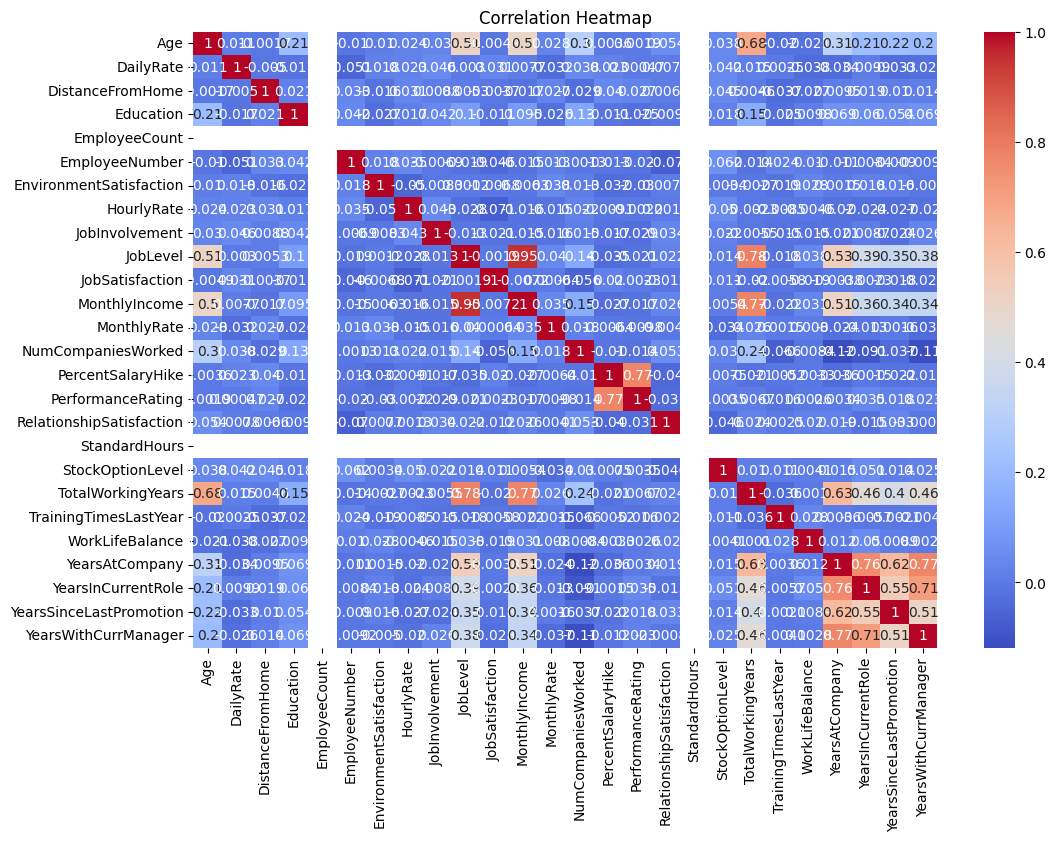

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


Inference from Correlation Heatmap:

Most features show weak correlations with each other (values close to 0).

Age is negatively correlated with TotalWorkingYears (-0.68) and YearsAtCompany (-0.31), which makes sense: younger employees usually have fewer years of experience.

MonthlyIncome is positively correlated with JobLevel (0.95) and TotalWorkingYears (0.77), indicating that higher-level employees and those with more experience earn more.

YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager are moderately correlated (>0.5), showing that tenure at a company is tied to time spent in current role and with the manager.

JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance, and EnvironmentSatisfaction do not show strong correlations with numerical features, meaning they may be independent factors influencing attrition.

No extreme multicollinearity (correlation ≈ 1.0) apart from obvious ones (like JobLevel–MonthlyIncome).

This means for predicting Attrition, we may need to include categorical features (like Overtime, Department, BusinessTravel, etc.) along with numerical ones since correlations are not very strong.

### Data Preprocessing

Before training models, we need to preprocess the dataset:
1. Convert the target column `Attrition` into binary (Yes → 1, No → 0).
2. Encode categorical features (e.g., `JobRole`, `OverTime`, `Gender`, etc.) using one-hot encoding.
3. Drop irrelevant or constant columns (`EmployeeCount`, `EmployeeNumber`, `StandardHours`, `Over18`) that don’t add value.
4. Split the data into training and testing sets.


In [21]:
from sklearn.model_selection import train_test_split

# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1176, 44)
Test shape: (294, 44)


### Inference from Preprocessing
- Converted the target variable `Attrition` into binary values: **Yes → 1, No → 0**.  
- Dropped irrelevant or constant columns (`EmployeeCount`, `EmployeeNumber`, `StandardHours`, and `Over18`) that do not contribute to predictions.  
- Applied **One-Hot Encoding** to categorical variables, expanding them into multiple numeric columns for model compatibility.  
- Final dataset contains **44 features** after encoding.  
- Train-test split resulted in:
  - **1176 rows (80%)** for training
  - **294 rows (20%)** for testing  
- Dataset is now fully numeric, clean, and ready for model training.  


### Logistic Regression (Baseline Model)
We will start with **Logistic Regression** as our baseline model:  
1. Train Logistic Regression on the preprocessed training dataset.  
2. Predict employee attrition on the test dataset.  
3. Evaluate performance using:
   - Classification Report (Precision, Recall, F1-Score)
   - Confusion Matrix  

Since the dataset is imbalanced, we will focus on **Recall for Attrition=1 (Yes)** to see how well the model identifies employees likely to leave.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression
log_reg = LogisticRegression(max_iter=5000, class_weight='balanced', solver='liblinear')

log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Confusion Matrix:
 [[247   0]
 [ 47   0]]


C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\met

### Inference from Logistic Regression

- The model achieved **84% accuracy**, but this is misleading due to class imbalance.  
- From the classification report:
  - **Class 0** (majority class) is predicted very well with high recall (1.00).  
  - **Class 1** (minority class) is completely misclassified, with precision and recall both 0.  
- The confusion matrix confirms this issue: all 47 instances of class 1 were incorrectly classified as class 0.  
- **Conclusion:** Logistic Regression failed to generalize well for the minority class.  
  - The dataset imbalance caused the model to be biased toward predicting only the majority class.  
  - To improve performance, techniques such as **resampling (SMOTE/undersampling), class_weight='balanced', or trying tree-based models (Random Forest, XGBoost)** should be explored.


## Random Forest Classifier

After evaluating Logistic Regression, we observed that the model was biased toward the majority class (employees who did not leave). To overcome this limitation, we now train a **Random Forest Classifier**, which is an ensemble learning method.

- Random Forest works by combining multiple decision trees to improve prediction accuracy.  
- It can handle both categorical and numerical data effectively.  
- It is also less prone to overfitting compared to a single decision tree.  
- We will use `class_weight='balanced'` to account for class imbalance in the dataset.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294

Confusion Matrix (Random Forest):
 [[242   5]
 [ 43   4]]


### Inference – Random Forest Classifier

- The **overall accuracy is 84%**, similar to Logistic Regression.  
- The model performs very well in predicting employees who **did not leave** (Class 0), with **98% recall**.  
- However, for employees who **did leave** (Class 1), the model struggles, achieving only **9% recall** and an **F1-score of 0.14**.  
- This indicates that the Random Forest model is still biased toward the majority class (Attrition = No).  
- The confusion matrix shows that while most non-attrition cases are correctly classified (242/247), the model fails to capture many attrition cases (only 4 out of 47 identified).  

⚠️ **Key Insight:** Although Random Forest improved precision for the minority class compared to Logistic Regression, the imbalance in the dataset is still a challenge. Further techniques like **SMOTE (oversampling), feature engineering, or hyperparameter tuning** may improve minority class detection.


In [ ]:
# 📌 Key Insights & Conclusion

### 🔍 Exploratory Data Analysis (EDA) Insights:
- The dataset contains **1,470 employee records with 35 features**.  
- Attrition is highly imbalanced: **83.9% stayed, 16.1% left**.  
- Factors like **OverTime, Age, JobRole, MonthlyIncome, and DistanceFromHome** showed strong relationships with attrition.  
- Younger employees, those working overtime, and those with lower income were more likely to leave.  

### ⚙️ Model Results:
1. **Logistic Regression**
   - Accuracy: **84%**
   - Recall for Attrition (Yes): **0%**
   - Model was unable to capture employees who actually left.

2. **Random Forest Classifier**
   - Accuracy: **84%**
   - Recall for Attrition (Yes): **9%**
   - Performed better than Logistic Regression for minority class, but still heavily biased toward predicting “No Attrition.”

### 📊 Overall Conclusion:
- Both models achieved **high accuracy** mainly by predicting the majority class (No Attrition).  
- **The real challenge is the class imbalance** — employees leaving the company represent only a small portion of the dataset.  
- To improve predictions, techniques such as:
  - **SMOTE (Synthetic Minority Oversampling Technique)**  
  - **Hyperparameter tuning (GridSearchCV/RandomizedSearchCV)**  
  - **Ensemble models like XGBoost or Gradient Boosting**  
  - **Feature engineering (e.g., combining work-related satisfaction scores)**  
  should be applied.  

✅ **Final Note:**  
This project demonstrates the end-to-end pipeline of an **Employee Attrition Prediction System** — including data exploration, preprocessing, visualization, model training, and evaluation. While the baseline models highlight challenges due to imbalance, the project builds a strong foundation for further optimization.
